In [2]:
import pandas as pd
import numpy as np
import warnings

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


import lightgbm as lgb
from lightgbm import LGBMRegressor

# Part 1: Data Preparation

## Step 1: Open the file and study the general information

In [3]:
data_arc = pd.read_csv("final_steel_en/data_arc_en.csv")

data_arc.info()
data_arc.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                14876 non-null  int64  
 1   Arc heating start  14876 non-null  object 
 2   Arc heating end    14876 non-null  object 
 3   Active power       14876 non-null  float64
 4   Reactive power     14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


,key,Arc heating start,Arc heating end,Active power,Reactive power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


In [19]:
data_bulk = pd.read_csv("final_steel_en/data_bulk_en.csv")

data_bulk.info()
data_bulk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [18]:
data_bulk_time = pd.read_csv("final_steel_en/data_bulk_time_en.csv")

data_bulk_time.info()
data_bulk_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [6]:
data_gas = pd.read_csv("final_steel_en/data_gas_en.csv")

data_gas.info()
data_gas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Gas 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,Gas 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [17]:
data_temp = pd.read_csv("final_steel_en/data_temp_en.csv")

data_temp.info()
data_temp.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            15907 non-null  int64  
 1   Sampling time  15907 non-null  object 
 2   Temperature    13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


,key,Sampling time,Temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


In [8]:
data_wire = pd.read_csv("final_steel_en/data_wire_en.csv")

data_wire.info()
data_wire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_wire_time = pd.read_csv("final_steel_en/data_wire_time_en.csv")

data_wire_time.info()
data_wire_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll first need to determine the data that we'll use in the model. Let's first look through our datasets to determine values to use as our features. First of all, we need to know our target.

**Target**: final temperature. This is found in the **data_temp_en** file as the last row for each unique key.

Now we'll look through each dataset to determine which features to use.

**data_arc_en.csv**

1. Each **key**(processing iteration) has several rows of values. To convert these rows into features, we'll aggregate them by determining the **total time** molten steel is heated for each processing iteration. This will be calculated from the **arc heating start** and **arc heating end** columns.
2. **Active power** is the power consumed in the process, while **reactive power** is power that flows in the process, but is not consumed. Total power consumed should have an effect on the final temperature of our metal, so we'll aggregate the active power by taking the **total sum for each key**.

**data_bulk_en.csv**

1. Each key has several corresponding columns, the majority of which are null values. These values consist of the size of bulk materials added during the sulfur removal process. Since all of the materials are added during this process alone, we'll aggregate these values and take the **sum of bulk columns** and use if as a feature for our model.

**data_bulk_time_en.csv**

1. The columns seems to consist of the the time at which bulk material is added during the desulfurization process. However, the bulk 12, 14, and 15 columns seem to have the same values for each observation. Overall this data doesn't seem to contribute much to our model.

**data_gas_en.csv**

1. This data seems to quantify the amount of inert gas each processing iteration is purged with. This is a quantitative feature that will contribute to our model.

**data_temp_en.csv**

1. Each key has several rows of values. These correspond to the temperature taken during the process of alloying elements, and the time. The most important values are **temperature taken before alloying, and the optimal melting temperature(final temperature)**. We'll utilize these in our model.

**data_wire_en.csv**

1. This data quantifies the amount of feeder material added during the desulfurization process. Similarly to data_bulk_en.csv, we'll aggregate the amount of feeder and use the **sum of wire columns(feeder material)** as a feature for our model.

**data_wire_time_en.csv**

1. The columns seems to consist of the the time at which feeder material is added during the desulfurization process. Similarly to data_bulk_time_en.csv, this data doesn't seem to contribute much to our model.

### Clarifying Questions

1. Why is reactive power saved in our data? Does it play an important role in determining final temperature? Should I be using apparent power as a feature for our model, rather than active power or reactive power?
2. Why are some features(bulk 12, 14, 15) the same for each observation? How does bulk material delivery data contribute to the final temperature of our metal?
3. How does feeder material delivery data contribute to the final temperature of our metal?

Now that we know which features and target we'll use for our model, we can outline the steps for creating our model as follows.

### Steps

1. Data Preprocessing

In this step, we first check the data type for all columns in our dataframes. In this case, our first dataframe needs the two columns **arc heating start** and **arc heating end** to be converted to datetime objects in order to determine the total time required for each key. We'll then need to aggregate the columns used for developing our model.

2. Data Analysis

In this step, we'll check our features to determine if there are any outliers, or null values. Outliers and null values will impede with our model training, so we'll need to remove them.

3. Model Training

Once our data is preprocessed and outliers are removed, we can then commence building our machine learning model. We'll first split our data into a training and validation set, with a 3:1 split. We'll then standardize our data, since our features have different scales. Afterwards we'll test different hyperparameters, using cross-validation to test. We'll try different models to see which returns the best result.

4. Conclusion

Lastly, we'll analyze our models and determine which produces the best result. By testing and comparing different models, we'll come to our best solution.

## Step 2: Preprocess the data

In [10]:
#convert to datetime
data_arc['Arc heating start'] = pd.to_datetime(data_arc['Arc heating start'])
data_arc['Arc heating end'] = pd.to_datetime(data_arc['Arc heating end'])

#check
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                14876 non-null  int64         
 1   Arc heating start  14876 non-null  datetime64[ns]
 2   Arc heating end    14876 non-null  datetime64[ns]
 3   Active power       14876 non-null  float64       
 4   Reactive power     14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [11]:
#create column of time difference
data_arc['time'] = data_arc['Arc heating end'] - data_arc['Arc heating start']

data_arc.info()

#convert to seconds. seconds chosen as measurement for precision
data_arc['time'] = data_arc['time'].astype('timedelta64[s]').astype(np.int32)
data_arc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   key                14876 non-null  int64          
 1   Arc heating start  14876 non-null  datetime64[ns] 
 2   Arc heating end    14876 non-null  datetime64[ns] 
 3   Active power       14876 non-null  float64        
 4   Reactive power     14876 non-null  float64        
 5   time               14876 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), timedelta64[ns](1)
memory usage: 697.4 KB


,key,Arc heating start,Arc heating end,Active power,Reactive power,time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148


In [12]:
#aggregate data
agg_data_arc = data_arc.groupby('key').sum()

agg_data_arc.info()
agg_data_arc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Active power    3214 non-null   float64
 1   Reactive power  3214 non-null   float64
 2   time            3214 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 87.9 KB


,Active power,Reactive power,time
key,,,
1,4.878147,3.183241,1098
2,3.052598,1.998112,811
3,2.525882,1.599076,655
4,3.209250,2.060298,741
5,3.347173,2.252643,869


In [13]:
#aggregate bulk data
bulk_list = list(data_bulk)
bulk_list = bulk_list[1:16]
data_bulk['total_bulk'] = data_bulk[bulk_list].sum(axis=1, skipna=True)

agg_data_bulk = data_bulk[['key','total_bulk']]

agg_data_bulk.info()
agg_data_bulk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         3129 non-null   int64  
 1   total_bulk  3129 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.0 KB


,key,total_bulk
0,1,553.0
1,2,582.0
2,3,544.0
3,4,595.0
4,5,584.0


In [15]:
#get entries that did not change temperature pre and post alloying(entries with null values)
keys_with_nulls = data_temp[data_temp['Temperature'].isnull()]['key'].unique().tolist()
keys_with_nulls[:5]

[2500, 2501, 2502, 2503, 2504]

In [91]:
#retrieve first and last temperature values for each key
processed_data_temp = data_temp.groupby('key', as_index=False)
pre_alloy = processed_data_temp.first()
optimal_temp = processed_data_temp.last()

final_temp_data = pre_alloy[['key','Temperature']]
final_temp_data.columns = ['key', 'pre_alloy_temp']
final_temp_data['optimal_temp'] = optimal_temp['Temperature']

#drop entries that did not change temperature pre and post alloying
to_drop = final_temp_data[final_temp_data['key'].isin(keys_with_nulls)].index
final_temp_data = final_temp_data.drop(to_drop)

final_temp_data.info()
final_temp_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             2477 non-null   int64  
 1   pre_alloy_temp  2477 non-null   float64
 2   optimal_temp    2477 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 77.4 KB


,key,pre_alloy_temp,optimal_temp
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0


In [92]:
#aggregate wire data
wire_list = list(data_wire)
wire_list = wire_list[1:10]

data_wire['total_wire'] = data_wire[wire_list].sum(axis=1, skipna=True)

agg_data_wire = data_wire[['key','total_wire']]

agg_data_wire.info()
agg_data_wire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         3081 non-null   int64  
 1   total_wire  3081 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 48.3 KB


,key,total_wire
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,98.352796


In [93]:
#merge data together
final_data = agg_data_arc
append_list = [agg_data_bulk, agg_data_wire, final_temp_data]
for df in append_list:
    final_data = final_data.merge(df, how='left', on='key')

final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             3214 non-null   int64  
 1   Active power    3214 non-null   float64
 2   Reactive power  3214 non-null   float64
 3   time            3214 non-null   int32  
 4   total_bulk      3128 non-null   float64
 5   total_wire      3080 non-null   float64
 6   pre_alloy_temp  2475 non-null   float64
 7   optimal_temp    2475 non-null   float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 213.4 KB


,key,Active power,Reactive power,time,total_bulk,total_wire,pre_alloy_temp,optimal_temp
0,1,4.878147,3.183241,1098,553.0,60.059998,1571.0,1613.0
1,2,3.052598,1.998112,811,582.0,96.052315,1581.0,1602.0
2,3,2.525882,1.599076,655,544.0,91.160157,1596.0,1599.0
3,4,3.209250,2.060298,741,595.0,89.063515,1601.0,1625.0
4,5,3.347173,2.252643,869,584.0,98.352796,1576.0,1602.0


# Part 2: Data analysis

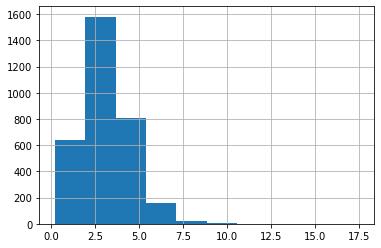

In [94]:
final_data['Active power'].hist()

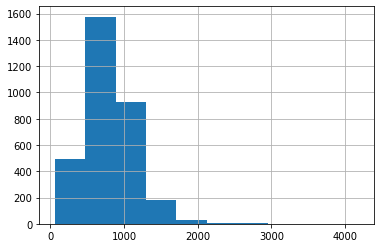

In [95]:
final_data['time'].hist()

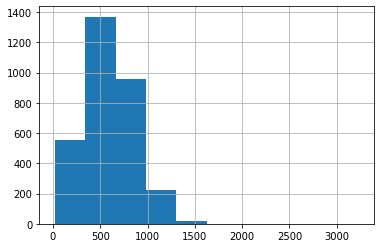

In [96]:
final_data['total_bulk'].hist()

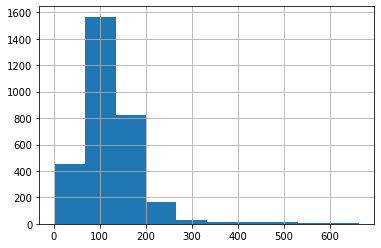

In [97]:
final_data['total_wire'].hist()

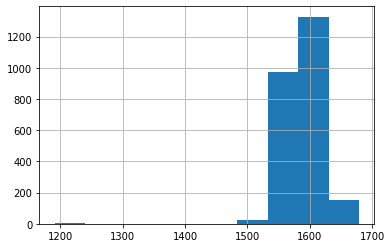

In [98]:
final_data['pre_alloy_temp'].hist()

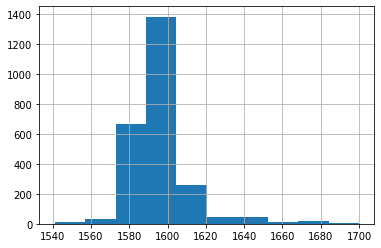

In [99]:
final_data['optimal_temp'].hist()

Data shows that our distributions are skewed, with several ourliers. We'll remove these outliers form our datasets to train our model better.

In [100]:
'''
we'll define a function that :
1. finds the interquartile range
2. determines the low/high fences
3. creates a map containing col_names as keys, and low/high fences as the values
4. removes outliers for each column based on the fences in the map
5. returns a processed new dataframe 
'''

from collections import defaultdict
def remove_outlier(df_in, col_names):
    fence_map = defaultdict(list)
    for name in col_names:
        q1 = df_in[name].quantile(0.25)
        q3 = df_in[name].quantile(0.75)
        iqr = q3-q1 
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        fence_map[name] = (fence_low, fence_high)
    df_out = df_in
    for k, v in fence_map.items():
        df_out = df_out.loc[(df_out[k] > v[0]) & (df_out[k] < v[1])]

    return df_out

parameters = ['Active power', 'time', 'total_bulk', 'total_wire', 'pre_alloy_temp', 'optimal_temp']

print(final_data.shape)

ml_data = remove_outlier(final_data, parameters)

print(ml_data.shape)

(3214, 8)
(2063, 8)


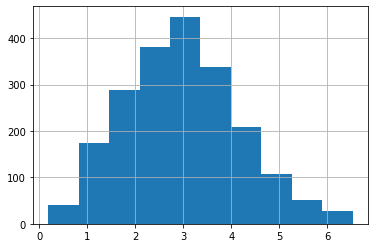

In [101]:
ml_data['Active power'].hist()

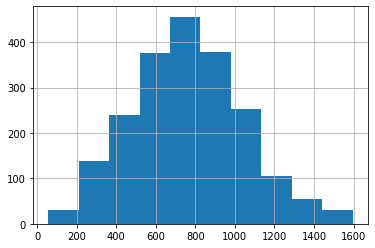

In [102]:
ml_data['time'].hist()

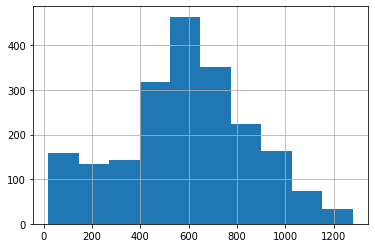

In [103]:
ml_data['total_bulk'].hist()

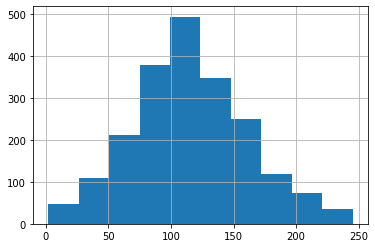

In [104]:
ml_data['total_wire'].hist()

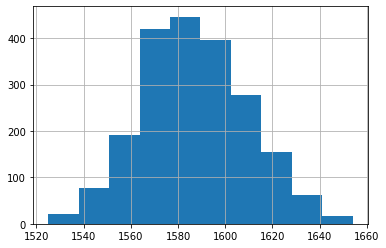

In [105]:
ml_data['pre_alloy_temp'].hist()

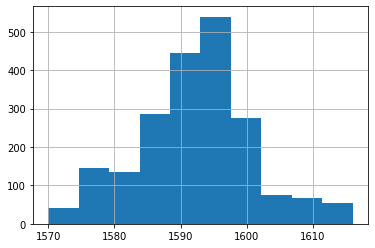

In [106]:
ml_data['optimal_temp'].hist()

Now that we've removed the outliers, our distributions look a lot better. We can now use our data to train our model!

# Step 3: Model training

In [107]:
ml_data.head()

,key,Active power,Reactive power,time,total_bulk,total_wire,pre_alloy_temp,optimal_temp
0,1,4.878147,3.183241,1098,553.0,60.059998,1571.0,1613.0
1,2,3.052598,1.998112,811,582.0,96.052315,1581.0,1602.0
2,3,2.525882,1.599076,655,544.0,91.160157,1596.0,1599.0
4,5,3.347173,2.252643,869,584.0,98.352796,1576.0,1602.0
5,6,3.955108,2.689175,952,676.0,108.224477,1543.0,1596.0


In [108]:
warnings.filterwarnings("ignore") #filter warnings created by standardizing data on copied dataframe

#split data
features = ml_data.drop(['key',  'Reactive power','optimal_temp'], axis=1)
target = ml_data['optimal_temp']

features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.25, random_state=12345)

#standardize
scaler = StandardScaler()
numeric = ['Active power', 'time', 'total_bulk', 'total_wire', 'pre_alloy_temp']

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

,Active power,time,total_bulk,total_wire,pre_alloy_temp
348,1.374268,1.252991,0.581365,-1.122041,-0.514707
1201,-0.249582,0.221358,-0.476795,-0.312284,1.243702
2009,-1.135696,-1.093257,-0.597727,-1.281937,-0.206985
1265,-0.346333,-0.441322,-0.457899,0.342304,-1.086189
839,0.053422,-0.004311,1.873831,1.356555,1.331622


### Linear Regression

In [109]:
model = LinearRegression()

model.fit(features_train, target_train)

prediction = model.predict(features_test)

lr_mae = mean_absolute_error(target_test, prediction)

print('MAE using linear regression:', lr_mae)

MAE using linear regression: 5.815106293197624


### Random Forest

In [110]:
#create model
rf_model = RandomForestRegressor(random_state=12345, n_estimators=100, min_samples_leaf=5)

#cross validate
cv = cross_validate(rf_model, features, target, cv=4, scoring='neg_mean_absolute_error')

#get results

rf_mae = cv['test_score'].mean() * -1

print(cv.keys())
print(cv['test_score'])

print('MAE using Random Forest:', rf_mae)

dict_keys(['fit_time', 'score_time', 'test_score'])
[-5.58567728 -5.81096119 -5.90076254 -5.38863619]
MAE using Random Forest: 5.671509301893005


### LightGBM

In [123]:
lgb = LGBMRegressor()

#create parameters for feature tuning
param = {
        'num_leaves': [20,31],
    'learning_rate': [.01,.005],
    'max_depth': [-1]
}

#pass parameters necessary for cross validation
gs = GridSearchCV(estimator=lgb,param_grid=param,scoring='neg_mean_absolute_error')

#fit model
lgb_model = gs.fit(X=features_train, y=target_train)
print(lgb_model.best_params_, lgb_model.best_score_*-1)

{'learning_rate': 0.01, 'max_depth': -1, 'num_leaves': 31} 5.737075871649432


From our testing, it seems that our Random Forest model produces the best result.

# Solution Report

The steps that we outlined in our plan consisted of data preprocessing, data analysis, and creating different models to determine our best solution. Each step was followed and completed thoroughly, and we trained three different models - a linear regression model, a random forest model, and a model with gradient boosting. 

Some of the initial difficulties in creating the solution included the selection of data for our model, and how to aggregate the data used for our model. To determine how to do so, I learned more about the different steps of steel processing, and by doing so I was able to weed our less relevant data such as reactive power, and determined that the best solution to utilize the bulk and wire data was to create a column with the totals for each. 

During the data preprocessing step the only difficulty was deciding how to remove batches that did not have a change in temperature pre and post alloying. This was accomplished by finding the batches with null values, and removing those batches entirely - null values signified no changes during the purging stage.

Since the target was already given to us, the key step was determining how to best create and choose features from the data provided. Once that was accomplished, model selection was simply testing different models, and selecting and testing hyperparameters that would train the model the best.

The final model is a random forest model with a score of 5.67 MAE. Closely tied to it is our model using gradient boosting with a MAE higher by only 0.05.